In [9]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                input_shape=(150, 150, 3))

In [10]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [11]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir       = "cat and dog"
train_dir      = "cat and dog/train"
validation_dir = "cat and dog/validation"
test_dir       = "cat and dog/test"

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 30

def extract_features(directory, sample_count):   
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
                                       directory,
                                       target_size=(150, 150),
                                       batch_size=batch_size,
                                       class_mode='binary')

    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
        
            break
    return features, labels

In [16]:
train_features, train_labels = extract_features(train_dir,2000 )
validation_features, validation_labels = extract_features(validation_dir,1000 )
test_features, test_labels = extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])


In [23]:
history = model.fit(train_features, train_labels,
epochs=20,
batch_size=30,
validation_data=(validation_features, validation_labels))

Epoch 1/20
67/67 [==============================] - 3s 40ms/step - loss: 0.5947 - acc: 0.6795 - val_loss: 0.4810 - val_acc: 0.8080
Epoch 2/20
67/67 [==============================] - 2s 35ms/step - loss: 0.4549 - acc: 0.7830 - val_loss: 0.4109 - val_acc: 0.8260
Epoch 3/20
67/67 [==============================] - 2s 35ms/step - loss: 0.3883 - acc: 0.8345 - val_loss: 0.3752 - val_acc: 0.8390
Epoch 4/20
67/67 [==============================] - 2s 35ms/step - loss: 0.3421 - acc: 0.8565 - val_loss: 0.3516 - val_acc: 0.8540
Epoch 5/20
67/67 [==============================] - 2s 36ms/step - loss: 0.3113 - acc: 0.8710 - val_loss: 0.3383 - val_acc: 0.8640
Epoch 6/20
67/67 [==============================] - 3s 40ms/step - loss: 0.2909 - acc: 0.8810 - val_loss: 0.3273 - val_acc: 0.8620
Epoch 7/20
67/67 [==============================] - 2s 35ms/step - loss: 0.2736 - acc: 0.8890 - val_loss: 0.3146 - val_acc: 0.8650
Epoch 8/20
67/67 [==============================] - 2s 35ms/step - loss: 0.2557 - a

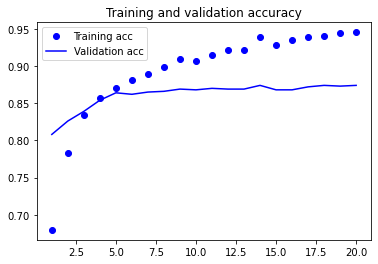

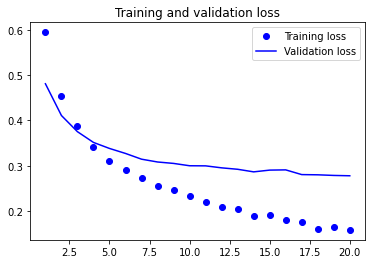

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
model.save('cats vs dogs.h5')